# 5. Numerical Elements -- Bouncing Object (40pts)

This exercise builds on the code you wrote for Exercise 4 in Homework 3. Here, we will make the motion of a falling object in two dimensions more realistic by allowing the object to bounce up again due to a normal force from the floor. Please take a look at the posted solution for Homework 3 as you will only need to change the forces at play.

In Homework 3, we introduced gravity and air resistance and studied their effects via a constant acceleration due to gravity and the force arising from air resistance. But what happens when the ball hits the floor? What if we would like to simulate the normal force from the floor acting on the ball? This exercise shows how we can include more complicated forces with no pain! And the force we include here is an example of a case where analytical solutions may either be difficult to find or we cannot find an analytical solution at all.

We need then to include a force model for the normal force from the floor on the ball. The simplest approach to such a system is to introduce a contact force model represented by a spring. So, we model the interaction between the floor and the ball as a single spring and the normal force is zero when there is no contact. 

This is a strong simplification of the actual process occurring at the contact between the ball and the floor due to the deformation of both the ball and the floor. The deformed region corresponds roughly to the region of **overlap** between the ball and the floor. The depth of this region is $\Delta y = R − y(t)$, where $R$ is the radius of the ball. This is supposed to represent the compression of the spring. Our model for the normal force acting on the ball is then

$$
\boldsymbol{N} = −k (R − y(t)) \boldsymbol{e}_y.
$$

The normal force must act upward when $y < R$, hence the sign must be negative. However, we must also ensure that the normal force only acts when the ball is in contact with the floor, otherwise the normal force is zero. The full formation of the normal force is therefore

$$
\boldsymbol{N} = k (R − y(t)) \boldsymbol{e}_y,
$$

when $y(t) < R$ and zero when $y(t) \le R$. In the numerical calculations you can choose $R=0.1$ m and the spring constant $k=1000$ N/m.

a. (20pts) Update the code from Exercise 4 in Homework 3 by completing the following steps:
1. Initialize any new constants for this physical system.
2. Set up a vector for the Gravitational Force (in 2D). 
3. Set up arrays for time, position (in 2D), and velocity (in 2D).
4. Define the initial conditions for the position and velocity (in 2D) as $\mathbf{x_{0}}=(10,0)$ and $\mathbf{v_{0}}=(5,0)$
5. Use Euler's method to calculate new positions, velocities, and times. Make sure to identify all of the forces acting on the ball to find the acceleration of the falling ball now with the normal force as well. *See AMS Ch. 7.5.1, in particular Figure 7.10 and Equation 7.10.*
6. Print the position velocities, and time. Comment on the structure of those arrays.

In [6]:
%matplotlib inline

# let's start by importing useful packages we are familiar with
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from math import sqrt, ceil, log, cosh, tanh

%matplotlib inline

In [18]:
import numpy as np
from math import sqrt, log, cosh, tanh, ceil

# Constants
g = 9.80655  # m/s^2, gravitational acceleration
D = 0.00245  # drag constant (mass/length) kg/m
m = 0.2  # kg, mass of the falling object
DeltaT = 0.001  # time step
tfinal = 10.0  # extend final time for multiple bounces
n = ceil(tfinal / DeltaT)  # number of points
k = 1000  # N/m, spring constant for the normal force
R = 0.1  # radius of the ball in meters

# Define scaling constant vT used in analytical solution
vT = sqrt(m * g / D)

t = np.zeros(n)
vx = np.zeros(n)
vy = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
yanalytic = np.zeros(n)
vyanalytic = np.zeros(n)

x[0] = 10.0  
y[0] = R  
vx[0] = 5.0  
vy[0] = 0.0  

for i in range(n - 1):
    speed = sqrt(vx[i] ** 2 + vy[i] ** 2) 
    
    ax = -D * vx[i] * speed / m
    ay = -g - D * vy[i] * speed / m

  
    if y[i] < R:
        ay += k * (R - y[i]) / m
        vy[i] = -vy[i]  

    vx[i + 1] = vx[i] + DeltaT * ax
    vy[i + 1] = vy[i] + DeltaT * ay

    x[i + 1] = x[i] + DeltaT * vx[i]
    y[i + 1] = y[i] + DeltaT * vy[i]

    t[i + 1] = t[i] + DeltaT

    yanalytic[i + 1] = y[0] - (vT ** 2 / g) * log(cosh(g * t[i + 1] / vT)) + vy[0] * t[i + 1]
    vyanalytic[i + 1] = vy[0] - vT * tanh(g * t[i + 1] / vT)

   
    if y[i + 1] < 0.0:
        break

max_y = np.max(y)
min_y = np.min(y)
max_vx = np.max(vx)
min_vx = np.min(vx)
max_vy = np.max(vy)
min_vy = np.min(vy)
max_time = t[np.argmax(y)]  
min_time = t[np.argmin(y)]  

# with the help of chatgpt I tried to make the result as informative as possible 
print(f"Maximum height reached by the ball: {max_y:.3f} m at time {max_time:.3f} s")
print(f"Minimum height reached by the ball: {min_y:.3f} m at time {min_time:.3f} s")
print(f"Maximum horizontal velocity (vx): {max_vx:.3f} m/s")
print(f"Minimum horizontal velocity (vx): {min_vx:.3f} m/s")
print(f"Maximum vertical velocity (vy): {max_vy:.3f} m/s")
print(f"Minimum vertical velocity (vy): {min_vy:.3f} m/s")

print(f"Final x-position: {x[i+1]:.3f} m")
print(f"Final y-position: {y[i+1]:.3f} m")


Maximum height reached by the ball: 0.149 m at time 9.942 s
Minimum height reached by the ball: 0.099 m at time 8.669 s
Maximum horizontal velocity (vx): 5.000 m/s
Minimum horizontal velocity (vx): 3.093 m/s
Maximum vertical velocity (vy): 0.982 m/s
Minimum vertical velocity (vy): -0.972 m/s
Final x-position: 48.973 m
Final y-position: 0.134 m


b. (20pts) Change the final time to a large enough value so you can study the ball bouncing up and down several times. Plot the trajectory of the bounce (y vs x) and the evolution of each of the velocity components (**v** vs t). Comment your results.

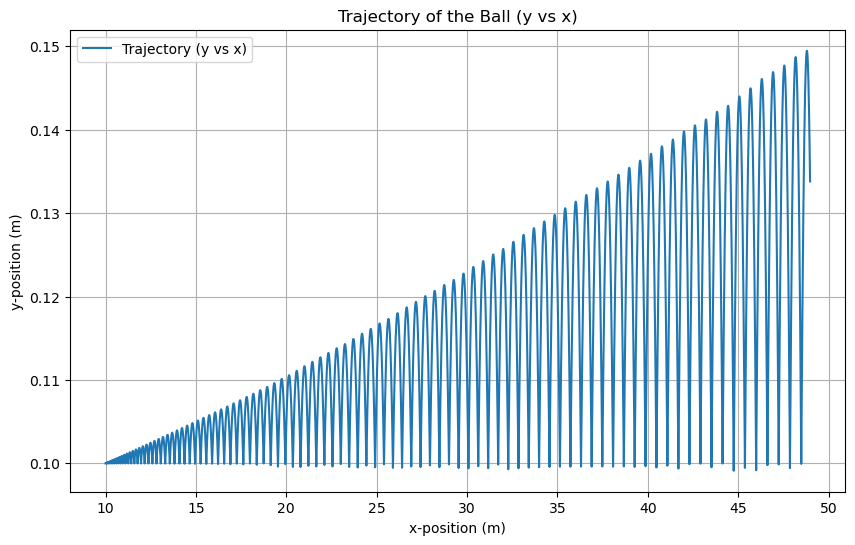

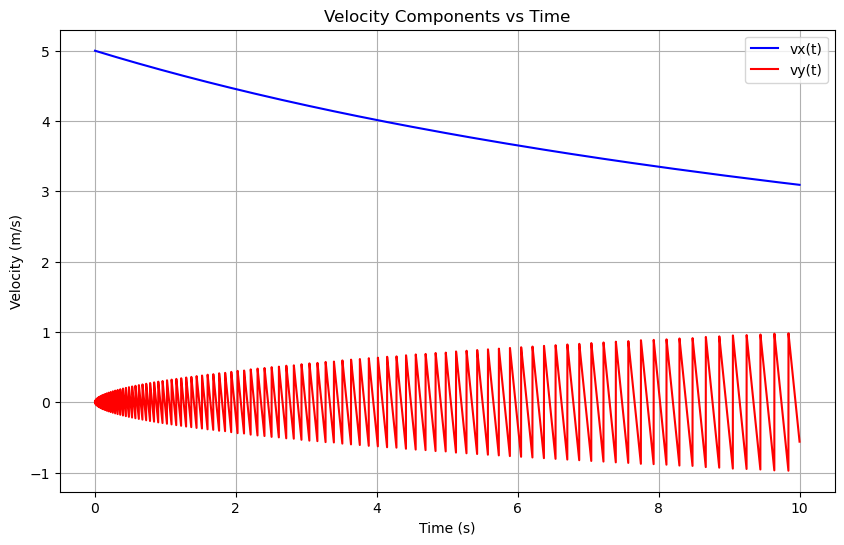

In [21]:


# Constants
g = 9.80655  # m/s^2, gravitational acceleration
D = 0.00245  # drag constant (mass/length) kg/m
m = 0.2  # kg, mass of the falling object
DeltaT = 0.001  
tfinal = 10.0 
n = ceil(tfinal / DeltaT)  
k = 1000  
R = 0.1  


t = np.zeros(n)
vx = np.zeros(n)
vy = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)


x[0] = 10.0  
y[0] = R  
vx[0] = 5.0 
vy[0] = 0.0  


for i in range(n - 1):
    speed = sqrt(vx[i] ** 2 + vy[i] ** 2)  

    
    ax = -D * vx[i] * speed / m
    ay = -g - D * vy[i] * speed / m

    
    if y[i] < R:
        ay += k * (R - y[i]) / m
        vy[i] = -vy[i]  
    
    vx[i + 1] = vx[i] + DeltaT * ax
    vy[i + 1] = vy[i] + DeltaT * ay

    
    x[i + 1] = x[i] + DeltaT * vx[i]
    y[i + 1] = y[i] + DeltaT * vy[i]

   
    t[i + 1] = t[i] + DeltaT

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Trajectory (y vs x)")
plt.title('Trajectory of the Ball (y vs x)')
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(t, vx, label="vx(t)", color='blue')
plt.plot(t, vy, label="vy(t)", color='red')
plt.title('Velocity Components vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()

# Show the plots
plt.show()
